## Importando librerías para EDA

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(6, 20)})

import missingno as msno


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve


#### Para este ejercicio utilizaremos solo el archivo 'test.csv' provisto por kaggle : https://www.kaggle.com/c/titanic

![title](PortadaTitanicCompetition.png)

### Lectura del dataset y Exploración inicial del dataset

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
train = pd.read_csv('/content/drive/MyDrive/Data Science - Portfolio/Practica ML/Titanic /train.csv')
test = pd.read_csv('/content/drive/MyDrive/Data Science - Portfolio/Practica ML/Titanic /test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
print(f"El df train tiene {train.shape[0]} filas y {train.shape[1]} columnas")
print(f"El df test tiene {test.shape[0]} filas y {test.shape[1]} columnas")

El df train tiene 891 filas y 12 columnas
El df test tiene 418 filas y 11 columnas


In [59]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [60]:

train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [61]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Comparación sobrevivientes y sexo

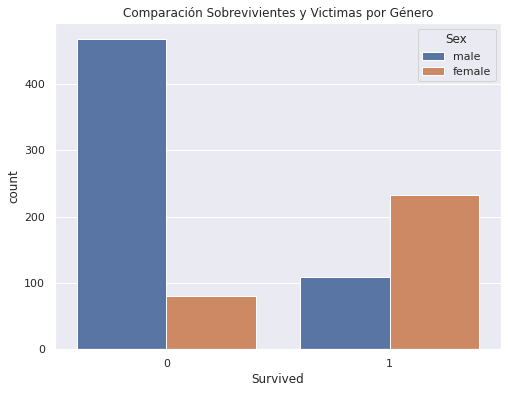

Mujeres y niños primeros!
Se puede ver que el mayor número de victímas corresponde a hombres, mientras que a la inversa, el mayor numero de sobrevivientes son de género femenino


In [63]:
sns.set({'figure.figsize': (8,6)})

# data2 = train[train['Survived']==1]


ax = sns.countplot(x='Survived', data=train, hue='Sex')
ax.set_title('Comparación Sobrevivientes y Victimas por Género')

plt.show()


print('Mujeres y niños primeros!')
print('Se puede ver que el mayor número de victímas corresponde a hombres, mientras que a la inversa, el mayor numero de sobrevivientes son de género femenino')



#### En la gráfica de arriba se puede ver que de los sobrevivientes, hay una mayor proporción de mujeres por sobre los hombres

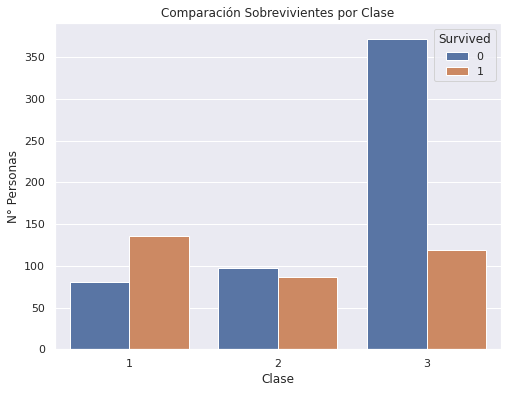

In [64]:


ax = sns.countplot(x="Pclass", data=train, hue='Survived')
ax.set_title('Comparación Sobrevivientes por Clase')
ax.set_ylabel('N° Personas')
ax.set_xlabel('Clase')

plt.show()

#### Distribución de frecuencias: personas fallecidas por rango etario

In [65]:
# sns.histplot(data=train[train['Survived']==0] , x=train['Age'], hue='Sex')

In [66]:
# sns.histplot(data=train[train['Survived']==1] , x=train['Age'], hue='Sex')

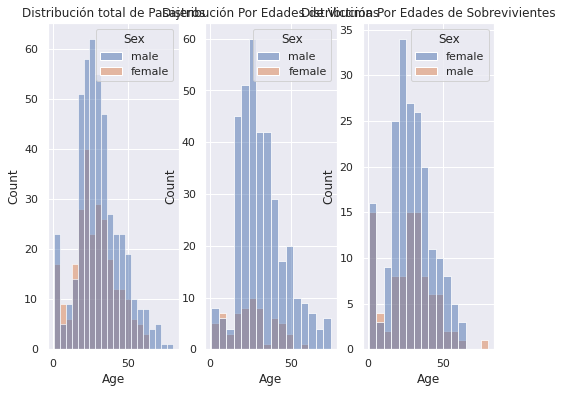

In [67]:
fig, ax =plt.subplots(1,3)
sns.set({'figure.figsize': (6, 20)})
fig1 = sns.histplot(data=train, x='Age', ax=ax[0], hue='Sex')
fig2 = sns.histplot(data=train[train['Survived'] == 0], x='Age', ax=ax[1],hue='Sex')
fig3 = sns.histplot(data=train[train['Survived'] == 1], x='Age', ax=ax[2],hue='Sex')

fig1.set_title('Distribución total de Pasajeros')
fig2.set_title('Distribución Por Edades de Victimas')
fig3.set_title('Distribución Por Edades de Sobrevivientes')



fig.show()




In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


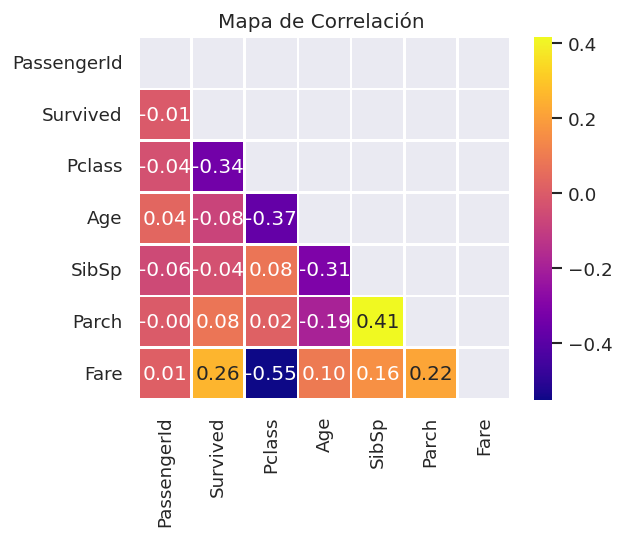

In [69]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(train.corr(),dtype = bool))
sns.heatmap(train.corr(), mask=mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Mapa de Correlación ')
plt.show()



In [70]:
# Como es esperable, se ve alta correlacción entre variables como 'Clase' (P.Class) y 'Tarifa' (Fare)
# Asi tambipen resulta interesante analizar cierta correlacción entre la clase/tarifa con la posibilidad de sobrevivir
# Además se percibe también una correlación negativa entre la edad y la clase.

In [71]:
#La edad era uno de los "missing values", por lo que vamos a trabajar más adelante para completar este faltante

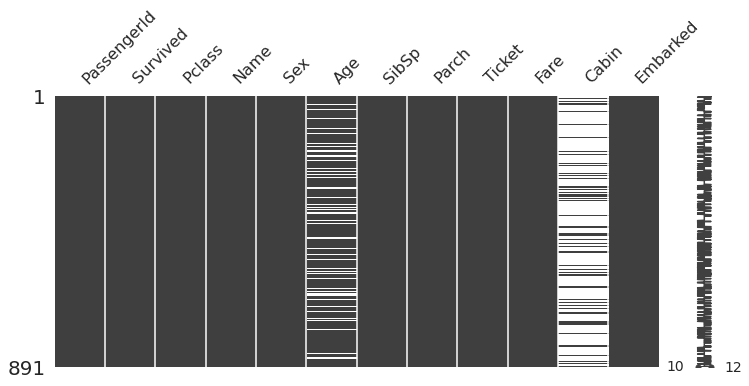

In [72]:
msno.matrix(train, figsize=(12, 5))

In [73]:
train2 = train.copy()

### Acomodando el dataset para aplicar el modelo de ML

#### 1) Reemplazando Missing Values variable 'AGE'

Text(0.5, 1.0, 'Distribución por edad')

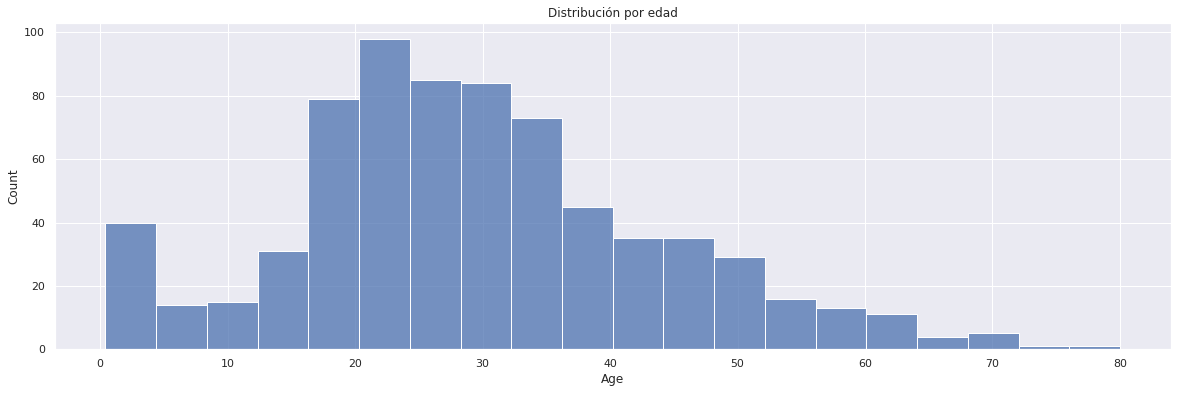

In [74]:
sns.set({'figure.figsize': (20, 6)})
dist_edad = sns.histplot(data=train, x='Age')
dist_edad.set_title('Distribución por edad')

In [75]:
# Para reemplazar faltante en 'EDAD' se va a utilizar un enfoque visto en https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial, 
# en el que primero se hace un análisis de la mediana por clase y género, para luego proceder a reemplazar con estos valores

train2.groupby(['Sex','Pclass']).median()['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [76]:
#Utilizamos formula para reemplazar los null values con la mediana de la serie

train2['Age'] = train2.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))




In [77]:
#Verificamos que ya no hay missing values en variable 'Age'

train2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

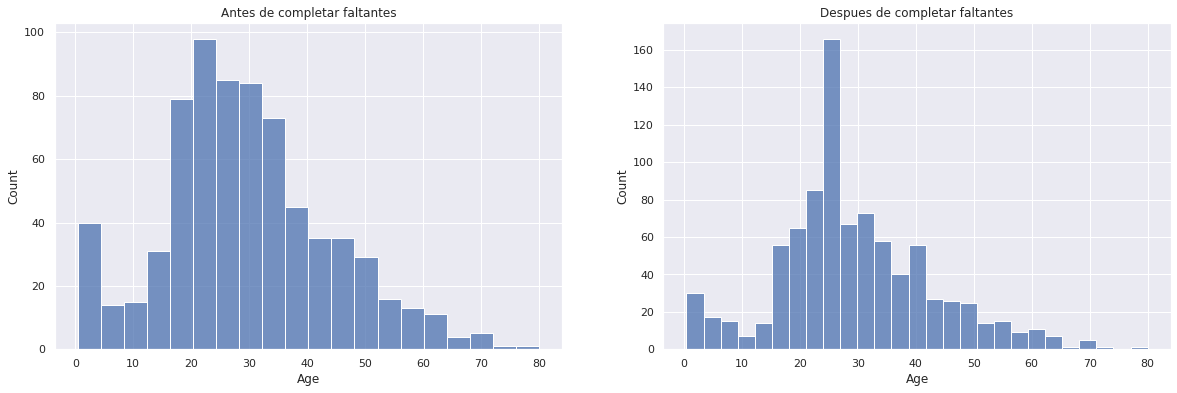

In [78]:
#Comparación antes y despues figura

fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize': (6, 20)})
fig1 = sns.histplot(data=train, x='Age', ax=ax[0])
fig2 = sns.histplot(data=train2, x='Age', ax=ax[1])

fig1.set_title('Antes de completar faltantes')
fig2.set_title('Despues de completar faltantes')

fig.show()





#### 2) Paso de categoricas a numericas a través de la función get.dummies 

In [79]:
#Creo un segundo df temporal para aplicar este paso 

df2 = pd.get_dummies(train2[['Sex','Embarked']])

df2.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


#### 3) Quitando columnas innecesarias y agregando las nuevas que se generaron con get.dummies()

In [80]:
#Del df original quito las columnas que transforme en numericas a través del método onehotencoding

train2 = train2.drop(['Sex','Embarked'], axis=1)


#Incluyo nuevas columnas numericas en el dataset original

train2 = pd.concat([train2, df2], axis = 1)


In [81]:
#Quito otras variables categóricas que a priori no serían muy relevantes para el desarrollo del modelo

train2 = train2.drop(['Name','Ticket', 'Cabin'], axis=1)


In [82]:
train2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [83]:
train2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


### Aplicando el modelo de Machine Learning ----- >    DecisionTreeClassifier

#### Separando el dataset en X e y

In [84]:
X = train2.drop('Survived', axis=1)
y = train2.Survived



#### Importando método train_test_split y Modelo a utilizar

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


####  Modelo 1: DecisionTreeClassifier

In [86]:

modelo = DecisionTreeClassifier(max_depth=4, random_state=42)


modelo.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

#### Poniendo a prueba! Utilizandolo para predecir:

In [87]:
y_train_predict = modelo.predict(X_train) 
y_test_predict = modelo.predict(X_test)

#### Creando la matriz de confusión para evaluar los resultados

In [88]:
#Creamos la matriz de confusión

matriz = confusion_matrix(y_test, y_test_predict)

print('Matriz de confusión')
print(matriz)

Matriz de confusión
[[138  19]
 [ 29  82]]


#### El modelo aplicado a priori da una buena proporción de valores acertados Verdaderos positivos y Verdaderos negativos. Aún así los el número de valores errónes es un poco alto

#### Evaluando porcentaje de acierto con "Accuracy_score"

In [89]:
#Calculamos el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_predict)

#Calculamos el accuracy en test
test_accuracy = accuracy_score(y_test, y_test_predict)


print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación', test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8443017656500803
% de aciertos sobre el set de evaluación 0.8208955223880597


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


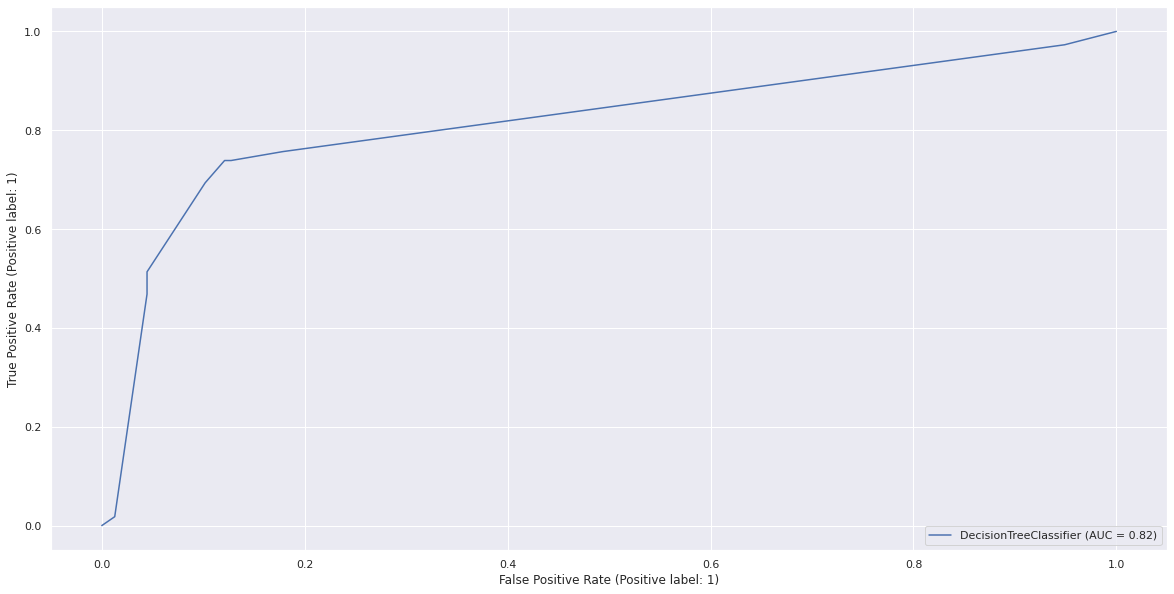

In [104]:
roc_auc_score(y_test, y_test_predict)
sns.set(rc={'figure.figsize': (20, 10)})
plot_roc_curve(modelo, X_test, y_test)

plt.show()

### Conclusión:

#### Se utilizó el algoritmo DecisionTreeClassifier para predecir los sobrevivientes del titanic. El algoritmo tuvo un porcentaje de  acierto del 84% en el set de entrenamiento y un porcentaje ligeramente menor en el de test 82%

#### Se reconoce una oportunidad de mejorar la eficacía del modelo (y su nivel de acierto en sí) en el proceso de limpieza y tratamiento de valores ausentes. 

#### Para este notebook utilicé la estrategia de reemplazar los faltantes de la variable "Age" con la mediana de la serie, sin embargo despues de explorar un poco. Entiendo que una estrategía mas certera puede aplicarse utilizando tecnicas de regresión para estimar estos valores

### Modelo 2: RandomForestClassifier

In [90]:
modelo_rf = RandomForestClassifier()

modelo_rf.fit(X_train, y_train)


RandomForestClassifier()

In [91]:
y_train_predict_rf = modelo_rf.predict(X_train) 
y_test_predict_rf = modelo_rf.predict(X_test)

In [92]:
matriz_rf = confusion_matrix(y_test, y_test_predict_rf)

print('Matriz de confusión')
print(matriz)

Matriz de confusión
[[138  19]
 [ 29  82]]


In [93]:
train_accuracy_rf = accuracy_score(y_train, y_train_predict_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_predict_rf)


print('% de aciertos sobre el set de entrenamiento:', train_accuracy_rf)
print('% de aciertos sobre el set de evaluación', test_accuracy_rf)

% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación 0.8097014925373134


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


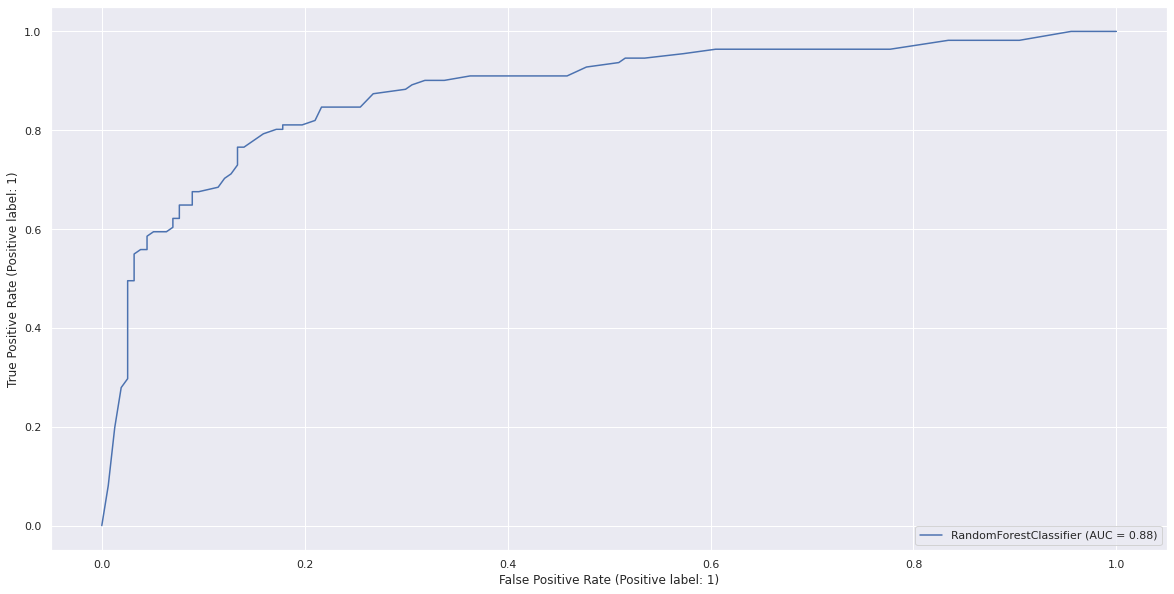

In [106]:
roc_auc_score(y_test, y_test_predict_rf)
sns.set(rc={'figure.figsize': (20, 10)})
plot_roc_curve(modelo_rf, X_test, y_test)

plt.show()